In [1]:
from bs4 import BeautifulSoup

In [2]:
import requests

Start by downloading George Washington's page

In [3]:
# url = 'https://en.wikipedia.org/wiki/George_Washington'

# response = requests.get(url)

In [4]:
# response.status_code  #200 = success!

In [5]:
# assert response.status_code == 200

In [6]:
# response.text[:1000]  #First 1000 characters of the HTML

In [7]:
# page = response.text

In [8]:
# soup = BeautifulSoup(page, 'html5lib')

In [9]:
# print(soup.prettify()[:1000])

In [10]:
# [object2.find('p') for object2 in [object.find_all('div', recursive=False) for object in soup.find_all('body')]]

In [11]:
# divs = soup.find('body').find_all('div', recursive=False)

In [12]:
# divs

In [13]:
# len(page)

Now, try to download and get a list of websites of presidencies of the united states.

In [80]:
url2 = 'https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States'

response = requests.get(url2)
assert response.status_code == 200, f'server recorded on error on reguest {url2}'

In [81]:
soup = BeautifulSoup(response.text)

In [88]:
def parse_presidential_links(soup):
    """Takes the soup object for the website 
    <list of presidents of united states>, and 
    returns a list of links to their wikipedia pages
    Note: The links are relative to the wikipedia homepage
    """
    
    rows = (soup.find(class_='wikitable').find('tbody')
               .find_all('tr'))
    links = []
    for row in rows: 
        if len(row.find_all('td')) > 0:
            if row.find_all('td')[0].find('a') is not None:
                a_tag = row.find_all('td')[0].find('a')
                if a_tag.get('title')[0:13] == 'Presidency of':
                    links.append(a_tag.get('href'))
    return links


        
        
    

In [86]:
links = parse_presidential_links(soup)

In [87]:
print(len(links))
print(links)


41
['/wiki/Presidency_of_George_Washington', '/wiki/Presidency_of_John_Adams', '/wiki/Presidency_of_Thomas_Jefferson', '/wiki/Presidency_of_James_Madison', '/wiki/Presidency_of_James_Monroe', '/wiki/Presidency_of_John_Quincy_Adams', '/wiki/Presidency_of_Andrew_Jackson', '/wiki/Presidency_of_Martin_Van_Buren', '/wiki/Presidency_of_John_Tyler', '/wiki/Presidency_of_James_K._Polk', '/wiki/Presidency_of_Zachary_Taylor', '/wiki/Presidency_of_Millard_Fillmore', '/wiki/Presidency_of_Franklin_Pierce', '/wiki/Presidency_of_James_Buchanan', '/wiki/Presidency_of_Abraham_Lincoln', '/wiki/Presidency_of_Andrew_Johnson', '/wiki/Presidency_of_Ulysses_S._Grant', '/wiki/Presidency_of_Rutherford_B._Hayes', '/wiki/Presidency_of_Chester_A._Arthur', '/wiki/Presidency_of_Benjamin_Harrison', '/wiki/Presidency_of_William_McKinley', '/wiki/Presidency_of_Theodore_Roosevelt', '/wiki/Presidency_of_William_Howard_Taft', '/wiki/Presidency_of_Woodrow_Wilson', '/wiki/Presidency_of_Warren_G._Harding', '/wiki/Presidency

In [91]:
import datetime
soups = []
for link in links:
    wiki_url = 'https://en.wikipedia.org/'
    full_url = wiki_url + link
    response = requests.get(full_url)
    assert response.status_code == 200, f'server recorded on error on reguest {full_url}'
    soup = BeautifulSoup(response.text)
    soups.append(soup)
    

In [93]:
lengths =[]
for soup in soups:
    lengths.append(len(soup.text))

In [95]:
print(lengths)

[166807, 69310, 75610, 74343, 71046, 58103, 104853, 69042, 73576, 83592, 84264, 60306, 65716, 72850, 130189, 83863, 169567, 68055, 54634, 71903, 97646, 101714, 77433, 140200, 98448, 75342, 84855, 193419, 149548, 145732, 121269, 128179, 124874, 81437, 113744, 106753, 89129, 84335, 110310, 200050, 303065]


In [96]:
import matplotlib.pyplot as plt

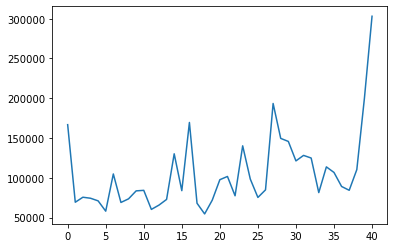

In [97]:
plt.plot(lengths)